In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd '/content/drive/My Drive'

/content/drive/My Drive/ITAú/TCC


In [0]:
%load_ext autoreload
%autoreload 2

from core.utils import *

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

## Importing structures

Structures containing images info (pandas.DataFrame) and segments localizations (dict) collected from SHP file

In [0]:
with open('./img_polygons.txt', 'rb') as handle:
  img_polygons = pickle.loads(handle.read())
  
with open('./df_img_info.pkl', 'rb') as handle:
  df_img_info = pickle.loads(handle.read())

In [0]:
df_img_info.head()

,x-scale,x-rotation,y-rotation,y-scale,x_first_pixel,y_first_pixel,x_last_pixel,y_last_pixel
001.jgw,0.25,0.0,0.0,-0.25,324000.0,9166000.0,325999.75,9164000.25
002.jgw,0.25,0.0,0.0,-0.25,322000.0,9166000.0,323999.75,9164000.25
003.jgw,0.25,0.0,0.0,-0.25,322000.0,9168000.0,323999.75,9166000.25
004.jgw,0.25,0.0,0.0,-0.25,324000.0,9168000.0,325999.75,9166000.25
005.jgw,0.25,0.0,0.0,-0.25,322000.0,9170000.0,323999.75,9168000.25


In [0]:
img_polygons['002.jgw']

[[(322941.3604738564, 9165596.002732156),
  (322935.5201562319, 9165575.79523614),
  (322922.4156110759, 9165581.202977657),
  (322928.6830022375, 9165599.844866328),
  (322941.3604738564, 9165596.002732156)],
 [(322825.3451271836, 9165602.92551742),
  (322825.5459859834, 9165590.484775985),
  (322813.6958139753, 9165589.6822828),
  (322813.6958139753, 9165602.52427083),
  (322825.3451271836, 9165602.92551742)],
 [(322716.0242452095, 9165604.532367881),
  (322715.8233864099, 9165596.105024405),
  (322707.3878139969, 9165596.506271),
  (322707.3878139969, 9165605.335094078),
  (322716.0242452095, 9165604.532367881)],
 [(322605.0040182418, 9165652.746037126),
  (322605.1994081137, 9165641.054662146),
  (322596.5202198298, 9165641.152061144),
  (322596.5202198298, 9165653.330431119),
  (322605.0040182418, 9165652.746037126)],
 [(322920.9887181176, 9165372.26977655),
  (322920.1186614356, 9165361.626722367),
  (322909.4656874217, 9165361.84388951),
  (322909.784376755, 9165372.31125268),
 

## Transform coordinates to pixel

### Test with image '001.jgw'

In [0]:
pxl_polygon = []
for polygon in img_polygons['001.jgw']:
  coords = []
  for coord in polygon:
    coords.append(tuple(coordinate2pixel(coord, df_img_info.loc['001.jgw']).reshape(1, -1).astype(int)[0]))
  pxl_polygon.append(coords)

In [0]:
pxl_polygon

[[(329, 148), (302, 181), (267, 151), (297, 121), (329, 148)],
 [(1724, 178), (1731, 252), (1681, 254), (1677, 180), (1724, 178)],
 [(1648, 232), (1647, 253), (1602, 251), (1604, 229), (1648, 232)],
 [(1907, 242), (1893, 277), (1839, 275), (1864, 222), (1907, 242)],
 [(3182, 1178), (3172, 1211), (3114, 1186), (3127, 1154), (3182, 1178)],
 [(2543, 2174), (2543, 2197), (2497, 2198), (2497, 2174), (2543, 2174)],
 [(2489, 2241), (2475, 2286), (2440, 2276), (2456, 2229), (2489, 2241)],
 [(2156, 2389), (2156, 2444), (2125, 2444), (2125, 2389), (2156, 2389)],
 [(336, 3933), (335, 3984), (276, 3983), (281, 3930), (336, 3933)],
 [(172, 4183), (165, 4204), (145, 4195), (154, 4175), (172, 4183)],
 [(881, 4780), (879, 4828), (841, 4825), (844, 4774), (881, 4780)],
 [(2488, 5499),
  (2587, 5529),
  (2568, 5598),
  (2468, 5569),
  (2482, 5515),
  (2488, 5499)],
 [(2318, 4418), (2305, 4459), (2268, 4446), (2282, 4406), (2318, 4418)],
 [(4386, 7539), (4373, 7576), (4340, 7561), (4356, 7522), (4386, 75

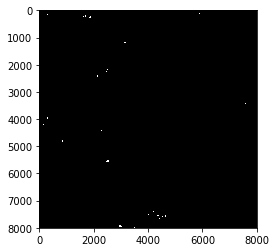

In [0]:
mask = np.zeros((8000,8000,3), np.uint8)
for points in pxl_polygon:
  pts = np.array(points, np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.fillPoly(mask,[pts],(255,255,255));
plt.imshow(mask)

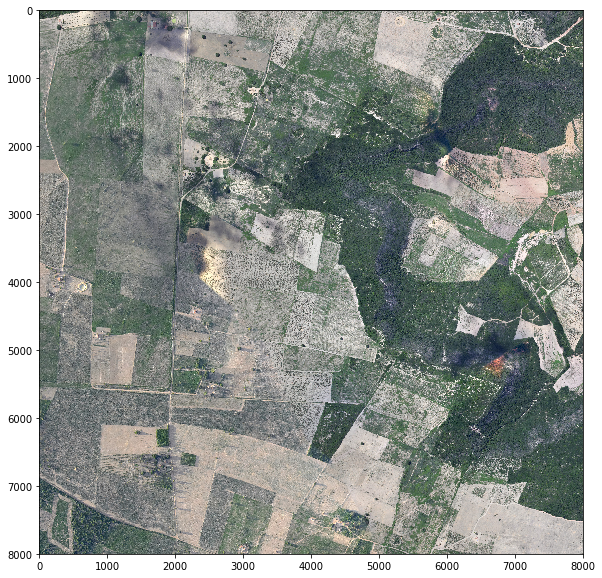

In [0]:
img = cv2.imread("001.jpg")


plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

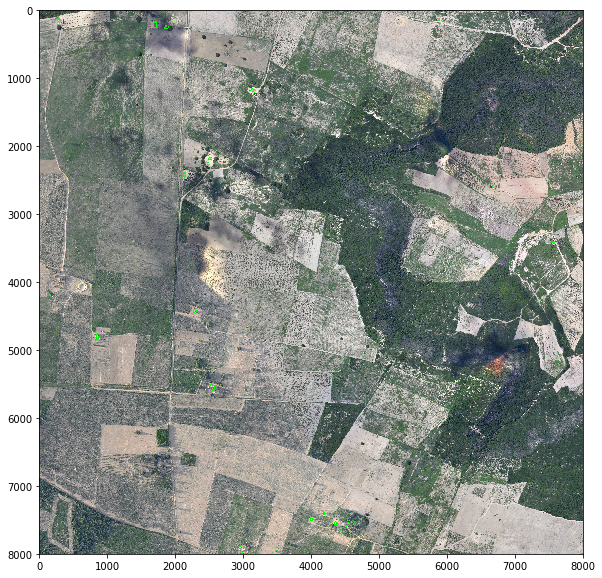

In [0]:
for points in pxl_polygon:
  pts = np.array(points, np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(img,[pts], False, (0, 255, 0), 10);
  
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [0]:
cv2.imwrite('./test_mask.jpg', img)

True

### Transforming all coordinates to pixel

In [0]:
from tqdm import tqdm

In [0]:
img_polygons_pxl = {}

for index in tqdm(img_polygons.keys()):
  pxl_polygon = []
  for polygon in img_polygons[index]:
    coords = []
    for coord in polygon:
      coords.append(tuple(coordinate2pixel(coord, df_img_info.loc[index]).reshape(1, -1).astype(int)[0]))
    pxl_polygon.append(coords)
  img_polygons_pxl[index] = pxl_polygon




  0%|          | 0/567 [00:00<?, ?it/s]


  0%|          | 2/567 [00:00<00:31, 18.09it/s]


  1%|          | 5/567 [00:00<00:27, 20.30it/s]


  1%|          | 7/567 [00:00<00:28, 19.48it/s]


  2%|▏         | 11/567 [00:00<00:25, 21.97it/s]


  2%|▏         | 13/567 [00:00<00:26, 21.30it/s]


  3%|▎         | 18/567 [00:00<00:21, 25.19it/s]


  4%|▍         | 24/567 [00:00<00:18, 29.05it/s]


  5%|▍         | 28/567 [00:00<00:18, 28.97it/s]


  6%|▌         | 34/567 [00:01<00:15, 33.56it/s]


  7%|▋         | 38/567 [00:01<00:15, 34.96it/s]


  8%|▊         | 43/567 [00:01<00:14, 36.73it/s]


  8%|▊         | 47/567 [00:01<00:14, 34.72it/s]


  9%|▉         | 51/567 [00:01<00:15, 34.16it/s]


 10%|▉         | 55/567 [00:01<00:17, 28.66it/s]


 11%|█▏        | 65/567 [00:02<00:27, 18.11it/s]


 12%|█▏        | 70/567 [00:02<00:23, 21.60it/s]


 14%|█▍        | 81/567 [00:03<00:17, 27.82it/s]


 15%|█▌        | 86/567 [00:03<00:21, 22.86it/s]


 16%|█▌        | 90/567 [00:03<00:22, 21

## Creating Masks

In [0]:
from tqdm import tqdm

In [0]:
for name, polygons in tqdm(img_polygons_pxl.items()):
    mask = np.zeros((8000,8000,3), np.uint8)
    for points in polygons:
        pts = np.array(points, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.fillPoly(mask,[pts],(255,255,255));
    cv2.imwrite('./masks/Chapada/edificacoes/'+name.split('.')[0]+'.jpg', mask)




  0%|          | 0/567 [00:00<?, ?it/s]


  0%|          | 1/567 [00:00<05:11,  1.82it/s]


  0%|          | 2/567 [00:01<05:16,  1.78it/s]


  1%|          | 3/567 [00:01<05:18,  1.77it/s]


  1%|          | 4/567 [00:02<05:18,  1.77it/s]


  1%|          | 5/567 [00:02<05:19,  1.76it/s]


  1%|          | 6/567 [00:03<05:16,  1.77it/s]


  1%|          | 7/567 [00:03<05:15,  1.77it/s]


  1%|▏         | 8/567 [00:04<05:14,  1.78it/s]


  2%|▏         | 9/567 [00:05<05:17,  1.76it/s]


  2%|▏         | 10/567 [00:05<05:17,  1.75it/s]


  2%|▏         | 11/567 [00:06<05:18,  1.75it/s]


  2%|▏         | 12/567 [00:06<05:18,  1.74it/s]


  2%|▏         | 13/567 [00:07<05:16,  1.75it/s]


  2%|▏         | 14/567 [00:07<05:15,  1.75it/s]


  3%|▎         | 15/567 [00:08<05:14,  1.75it/s]


  3%|▎         | 16/567 [00:09<05:15,  1.75it/s]


  3%|▎         | 17/567 [00:09<05:30,  1.66it/s]


  3%|▎         | 18/567 [00:10<05:26,  1.68it/s]


  3%|▎         | 19/567 [00:10<05:20,  1.71it/